# 算法画图

## 最速下降法

In [37]:
norm(x)=sqrt(x'* x)

norm (generic function with 1 method)

In [46]:
function steepest_descent(f, g, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=1000,
        debug=true) 
    
    array=[]
    xk = x0
    fk = f(xk...)
    for i in 1:maxIterations
        # iteration
        d =-g(xk...)
        α = search_for_alpha(f, xk, fk, d, -d)
        δ = α*d
        xn = xk .+ δ
        fn = f(xn...)
        # convegence?
        array=push!(array,xk)
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.","\n array",array)
            return xk, fk, d, δ,array
        end
          
        if debug
            println("i=",i, " α=", α, " xk=", xk, " d=", d, " δ= ",δ)
        end
      
        xk = xn
        fk = fn

        
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
    
end

steepest_descent (generic function with 1 method)

In [47]:
function search_for_alpha(f, xk, fk, d, g; α0=100, ϵ=0.5, τ=0.5) 
    α = α0
    ϕ0= d'*g
    while f((xk .+ α*d)...) > fk + ϵ*α*ϕ0
        α = τ*α
    end
    return α 
end

search_for_alpha (generic function with 1 method)

In [49]:
xk, fk, d, g,step1=
steepest_descent(
    (x,y)->x^2+3x*y+10.5y^2-x-17y,
    (x,y)->[2x+3y-1;3x+21y-17],
    [1.,1.]
)

i=1 α=0.048828125 xk=[1.0, 1.0] d=[-4.0, -7.0] δ= [-0.195313, -0.341797]
i=2 α=0.390625 xk=[0.804688, 0.658203] d=[-2.58398, 0.763672] δ= [-1.00937, 0.298309]
i=3 α=0.048828125 xk=[-0.204681, 0.956512] d=[-1.46017, -2.47272] δ= [-0.0712976, -0.120738]
i=4 α=0.390625 xk=[-0.275979, 0.835774] d=[-0.955365, 0.276677] δ= [-0.373189, 0.108077]
i=5 α=0.048828125 xk=[-0.649168, 0.943851] d=[-0.533216, -0.873368] δ= [-0.026036, -0.0426449]
i=6 α=0.390625 xk=[-0.675204, 0.901206] d=[-0.35321, 0.100283] δ= [-0.137973, 0.0391731]
i=7 α=0.048828125 xk=[-0.813177, 0.940379] d=[-0.194784, -0.308435] δ= [-0.00951094, -0.0150603]
i=8 α=0.390625 xk=[-0.822688, 0.925319] d=[-0.130581, 0.0363642] δ= [-0.0510083, 0.0142048]
i=9 α=0.048828125 xk=[-0.873696, 0.939524] d=[-0.0711789, -0.108911] δ= [-0.00347553, -0.00531791]
i=10 α=0.390625 xk=[-0.877172, 0.934206] d=[-0.0482741, 0.0131919] δ= [-0.0188571, 0.00515309]
i=11 α=0.048828125 xk=[-0.896029, 0.939359] d=[-0.0260192, -0.0384518] δ= [-0.00127047, -0.0

([-0.904735, 0.938689], -7.530288049212562, [-0.0065969, 0.00173835], [-0.00257692, 0.000679043], Any[[1.0, 1.0], [0.804688, 0.658203], [-0.204681, 0.956512], [-0.275979, 0.835774], [-0.649168, 0.943851], [-0.675204, 0.901206], [-0.813177, 0.940379], [-0.822688, 0.925319], [-0.873696, 0.939524], [-0.877172, 0.934206], [-0.896029, 0.939359], [-0.897299, 0.937481], [-0.90427, 0.939352], [-0.904735, 0.938689]])

In [51]:
step1

14-element Array{Any,1}:
 [1.0, 1.0]           
 [0.804688, 0.658203] 
 [-0.204681, 0.956512]
 [-0.275979, 0.835774]
 [-0.649168, 0.943851]
 [-0.675204, 0.901206]
 [-0.813177, 0.940379]
 [-0.822688, 0.925319]
 [-0.873696, 0.939524]
 [-0.877172, 0.934206]
 [-0.896029, 0.939359]
 [-0.897299, 0.937481]
 [-0.90427, 0.939352] 
 [-0.904735, 0.938689]

## 牛顿法

In [43]:
function Newton(f, g, h, x0;
        ϵx=0.01,ϵf=0.01,ϵg=0.01,maxtimes=128,debug=true)##多维中的牛顿法
    ep=[]
    xk=x0
    fk=f(xk...)
    for i in 1:maxtimes
        d=-inv(h(xk...))*g(xk...)
        α=1
        δ=α*d
        xn=xk.+δ
        fn=f(xn...)
        ep=push!(ep,xk)
        if(norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("convergence is reached after ",i," interations"," \n ep",ep)
            return xk,fk,d,δ,ep
        end
        if debug
            println("i=",i," xk=",xk," d=",d," δ=",δ)
        end
        xk=xn
        fk=fn
    end
  println("warn: ",maxtimes,"interations have been exceeded")
end

Newton (generic function with 1 method)

In [45]:
xk,fk,d,g,step2=
Newton(
    (x,y)->x^2+3x*y+10.5y^2-x-17y,
    (x,y)->[2x+3y-1;3x+21y-17],
    (x,y)->[2 3;3 21],
    [1.,1.],
    maxtimes=1000000,
    debug=true
)

i=1 xk=[1.0, 1.0] d=[-1.90909, -0.0606061] δ=[-1.90909, -0.0606061]
convergence is reached after 2 interations 
 epAny[[1.0, 1.0], [-0.909091, 0.939394]]


([-0.909091, 0.939394], -7.530303030303031, [0.0, 0.0], [0.0, 0.0], Any[[1.0, 1.0], [-0.909091, 0.939394]])

In [52]:
step2

2-element Array{Any,1}:
 [1.0, 1.0]           
 [-0.909091, 0.939394]

## 共轭方向法

In [54]:
function ConjugateGradientFSO(f, g, h, x0;
        ϵx=0.01, # precision for step size
        ϵf=0.01,
        ϵg=0.01,
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn,fn,gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [55]:
xn, fn, gn, step3=
ConjugateGradientFSO(
    (x,y)->x^2+3*x*y+10.5y^2-x-17y,
    (x,y)->[2*x+3*y-1, 3*x+21*y-17],
    [2 3; 3 21],
    [1.5,1.5],
    debug=false
)

Convergence is reached after 2 iterations.


([-0.909091, 0.939394], -7.530303030303031, [0.0, 0.0], Any[[1.5, 1.5], [1.1882, 0.588592], [-0.909091, 0.939394]])

In [56]:
step3

3-element Array{Any,1}:
 [1.5, 1.5]           
 [1.1882, 0.588592]   
 [-0.909091, 0.939394]

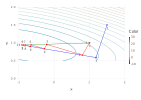

In [64]:
fun=layer((x,y)->x^2+3*x*y+10.5y^2-x-17y, -1, 2, 0.5, 2);
steepest=
layer(
    x=[step1[i][1] for i in 1:length(step1)],
    y=[step1[i][2] for i in 1:length(step1)],
    label=[string(i) for i in 1:length(step1)],
    Geom.point, Geom.line, Geom.label,
    Theme(default_color=colorant"red")
);
NT=layer(
    x=[step2[i][1] for i in 1:length(step2)],
    y=[step2[i][2] for i in 1:length(step2)],
    label=[string(i) for i in 1:length(step2)],
    Geom.point, Geom.line, Geom.label,
    Theme(default_color=colorant"green")
);
Conjugate=layer(
x=[step3[i][1] for i in 1:length(step3)],
y=[step3[i][2] for i in 1:length(step3)],
label=[string(i) for i in 1:length(step3)],
Geom.point, Geom.line, Geom.label,
    Theme(default_color=colorant"blue"));
plot(fun,steepest,NT,Conjugate)